In [1]:
!pip install bubbly

# for some basic operations
import numpy as np 
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

# for providing the path
import os
print(os.listdir("../input"))



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
       # print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5428 sha256=2c3b11bc5540d667b8d1ed623c61d1a14c10e4bbfbf8e40cb7d139122085a4cc
  Stored in directory: /root/.cache/pip/wheels/f3/a2/b4/e8c5235bb3da5f686d87429eac448bead93e17c7ac0d7cfc2d
Successfully built bubbly


['employee-salary-dataset']


# Reading Dataset

In [2]:
employee_salary = pd.read_csv('/kaggle/input/employee-salary-dataset/employee_data.csv')
employee_salary = employee_salary.drop(columns=['Unnamed: 0','id'])
employee_salary = employee_salary.astype({'groups':str, 'age':int, 'healthy_eating':int,'active_lifestyle':int, 'salary':int})
employee_salary.head()

,groups,age,healthy_eating,active_lifestyle,salary
0,A,36,5,5,2297
1,A,55,3,5,1134
2,A,61,8,1,4969
3,O,29,3,6,902
4,O,34,6,2,3574


**Correlations between Data**

* **Positive correlation** is a relationship between two variables in which both variables move in tandem—that is, in the same direction. A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other increases.

* **Negative correlation** is a relationship between two variables in which one variable increases as the other decreases, and vice versa. In statistics, a perfect negative correlation is represented by the value -1, a 0 indicates no correlation, and a +1 indicates a perfect positive correlation.

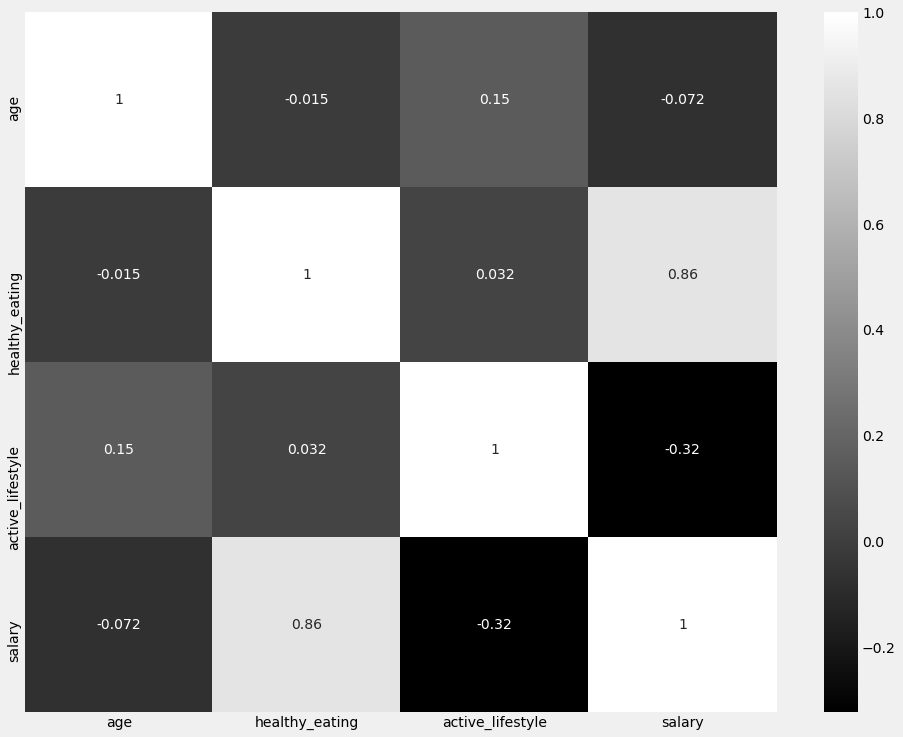

In [3]:
# Employee salary vs age

plt.rcParams['figure.figsize'] = (15, 12)
sns.heatmap(employee_salary.corr(), cmap='gray', annot=True)
plt.show()

* Salary is positively correlated with healthy eating heavily
* Age and Active lifestyle are negatively correlated with Salary

# Bubble Charts

**Healthy Eating VS Salary VS Age**

In [4]:
import plotly.express as px

fig = px.scatter(employee_salary, x='salary', y='healthy_eating',
                size='salary', color='age',
                hover_name = 'age', log_x=True, size_max=60)

fig.show()

**Healthy Eating VS Salary VS Groups**

In [5]:
import plotly.express as px

fig = px.scatter(employee_salary, x= 'salary', y='healthy_eating',
                size='salary', color='groups',
                hover_name = 'groups', log_x=True, size_max=60)

fig.show()

**Healthy Eating VS Salary VS Active lifestyle**

In [6]:
import plotly.express as px

fig = px.scatter(employee_salary, x= 'salary', y='healthy_eating',
                size='salary', color='active_lifestyle',
                hover_name = 'active_lifestyle', log_x=True, size_max=60)

fig.show()

Bubble plot to depict the relation between Healthy Eating VS Salary and size of the bubbles is represented by the Salary and the color of the bubbles is represented by the Active lifestyle

* As the Healthy Eating score increses Salary increases
* People with blood group 'B' are more in number
* People with less Salary has more Active LifeStyle

# Boxplot Charts

In [7]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y = employee_salary['salary'], name='Salary'))
fig.show()

In [8]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y = employee_salary['age'], name='Age'))
fig.show()

In [9]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y = employee_salary['groups'], name='Groups'))
fig.add_trace(go.Box(y = employee_salary['healthy_eating'], name='Healthy Eating'))
fig.add_trace(go.Box(y = employee_salary['active_lifestyle'], name='Active lifestyle'))

fig.show()

**Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).**

* median (Q2/50th Percentile): the middle value of the dataset.

* first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

* third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

* interquartile range (IQR): 25th to the 75th percentile.

* outliers (shown as green circles)

* “maximum”: Q3 + 1.5*IQR

* “minimum”: Q1 -1.5*IQR

# Data Preprocessing

In [10]:
X = employee_salary.drop(columns=['salary'])
Y = employee_salary['salary']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#make the x for train and test (also called validation data) 
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8,random_state=42)


# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()

xtrain['groups'] = label_encoder.fit_transform(xtrain['groups'])
xtest['groups'] = label_encoder.transform(xtest['groups'])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Model Creation and Training

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(xtrain, ytrain)


accuracy = reg.score(xtest, ytest)*100
print("Accuracy: {}".format(accuracy))
y_predict = reg.predict(xtest)

Accuracy: 90.68662862716256


# Distribution Plot of Test and Predict Value 

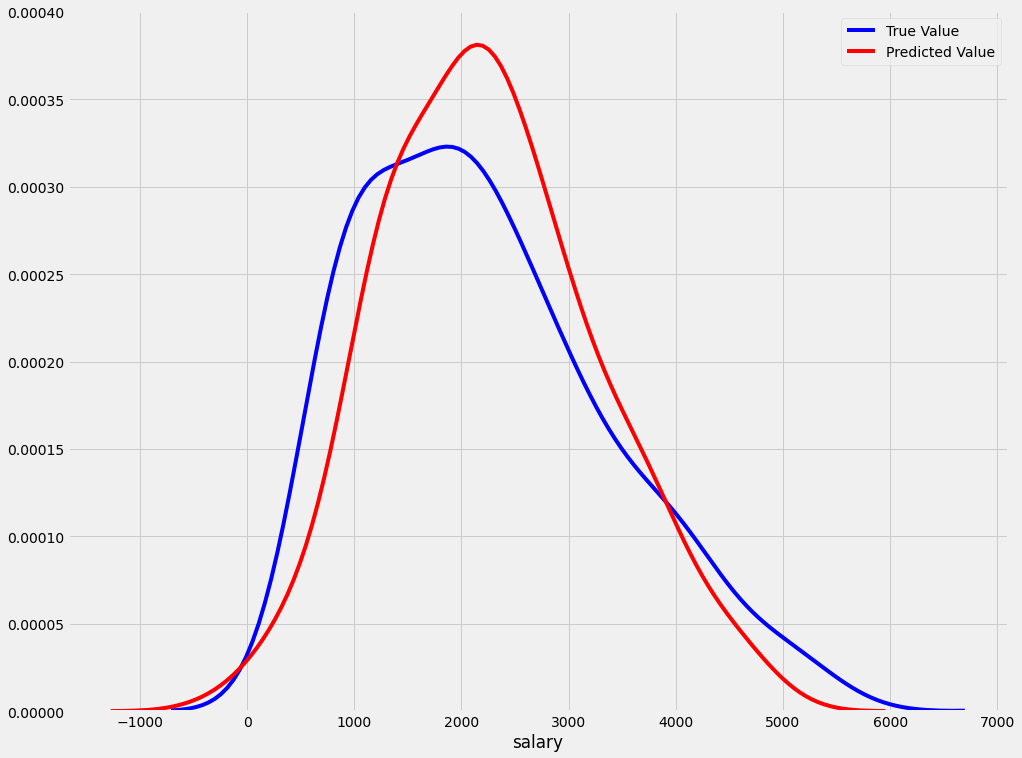

In [12]:
import numpy as np
import matplotlib.pyplot as plt

hist1 = ytest
hist2 = y_predict

from scipy.stats import norm

sns.distplot(hist1,color="b",hist=False, label='True Value')
sns.distplot(hist2,hist=False,color='red', label='Predicted Value')